In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import argparse
import seaborn as sns
from matplotlib.animation import FuncAnimation

# parser = argparse.ArgumentParser()
# parser.add_argument("--verbose", action="store_true")
# parser.add_argument("-q2", action="store_false")
# parser.add_argument("-q3", action="store_false")
# parser.add_argument("-q4", action="store_false")
# parser.add_argument("-q5", action="store_false")

# args = parser.parse_args()

class sgdregressor():
    def __init__(self):
        self.theta = 0
        self.lr = 0.01
        self.m, self.n = 0, 0
        self.r = 0
        self.eps = 1e-4
        self.iter_ct = 0
        self.train_error = np.inf

    def J(self, X, Y,theta,r):
        return (np.sum(np.square((Y-(X@theta.T)))))/2/r
    
    def gradiant(self, X, Y, theta,r):
        return X.T@((X@theta.T) - Y)/r
    
    def fit(self, X, Y, lr = 0.01, r = 1000,  verbose = 0, epochs = 5000, cst_stopping_condn = 0, view_steps = 0, k = 5):
        self.m = X.shape[0]
        self.n = X.shape[1]+1
        self.lr = lr
        self.r = r
        X = np.hstack((np.ones((self.m,1)), X)) # X = [1|X]
        self.theta = np.zeros((self.n,))

        cost = self.J(X,Y,self.theta,self.m)
        previous_cost = -np.inf
        history = [self.theta.copy()]
        J_values = [cost]
        moving_sums = []
        last_k = cost
        iter = 1
        grad = 20
        indices = np.arange(self.m)
        while (len(moving_sums) <= k or abs(moving_sums[-1]-moving_sums[-k-1]) > self.eps) and iter <= epochs:
            if view_steps and len(moving_sums) > k:
                print(iter, cost, abs(moving_sums[-1]-moving_sums[-k-1]))
            for i in range(0,self.m, r):
                bidx = indices[i:i+r]
                X_r = X[bidx,:]
                Y_r = Y[bidx]

                grad = self.gradiant(X_r, Y_r, self.theta,r)
                self.theta = self.theta - grad*self.lr
                
            
            cost = self.J(X,Y,self.theta,self.m)
            last_k+=cost
            if(len(J_values) >= k):
                if(len(J_values) > k):
                    last_k-=J_values[-k-1]
                moving_sums.append(last_k/k)
            J_values.append(cost)
            
            history.append(self.theta.copy())
            iter += 1
        self.iter_ct = iter
        self.train_error = self.J(X, Y,self.theta,self.m)
        if verbose:
            print(f"r = {r}, error = {self.train_error}, num_iter = {self.iter_ct}, theta = {self.theta}, error in theta = {np.linalg.norm(self.theta-theta,2)}")
        return history




# q1 start
def generate(theta, params, var , n_samples):
    X = np.empty((n_samples, theta.shape[0]-1))
    for i in range(theta.shape[0]-1):
        X[:,i] = np.random.normal(params[i][0],np.sqrt(params[i][1]),n_samples)
    err = np.random.normal(0,np.sqrt(var), n_samples)
    Y = theta[0] + X @ theta[1:] + err
    return (X,Y)

theta = np.array([3,1,2])
params = [(3,4),(-1,4)]
var = 2
n_samples = int(1e6)
X, Y = generate(theta, params=params, var=var, n_samples=n_samples)
df = pd.DataFrame({
    'x1' : X[:,0], 'x2':X[:,1], 'y':Y
})
# as the data is randomly sampled, we don't need to shuffle again. just split
# df = df.sample(frac=1)
df_train, df_test = df.head(int(0.8*n_samples)), df.tail(int(0.2*n_samples))
X_train, X_test, Y_train, Y_test = (np.array(df_train[['x1','x2']]), np.array(df_test[['x1','x2']]),
                                    np.array(df_train['y']), np.array(df_test['y']))

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

#q2 start
class sgdregressor():
    def __init__(self):
        self.theta = 0
        self.lr = 0.01
        self.m, self.n = 0, 0
        self.r = 0
        self.eps = 1e-4
        self.iter_ct = 0
        self.train_error = np.inf

    def J(self, X, Y,theta,r):
        return (np.sum(np.square((Y-(X@theta.T)))))/2/r
    
    def gradiant(self, X, Y, theta,r):
        return X.T@((X@theta.T) - Y)/r
    
    def fit(self, X, Y, lr = 0.01, r = 1000,  verbose = 0, cst_stopping_condn = 0, view_steps = 0, k = 5, epochs = 6000):
        self.m = X.shape[0]
        self.n = X.shape[1]+1
        self.lr = lr
        self.r = r
        X = np.hstack((np.ones((self.m,1)), X)) # X = [1|X]
        self.theta = np.zeros((self.n,))

        cost = self.J(X,Y,self.theta,self.m)
        history = [self.theta.copy()]
        J_values = [cost]
        moving_sums = []
        last_k = cost
        iter = 1
        grad = 20
        indices = np.arange(self.m)
        while (len(moving_sums) <= k or abs(moving_sums[-1]-moving_sums[-k-1]) > self.eps) and iter <= epochs:
            if view_steps and len(moving_sums) > k:
                print(iter, cost, abs(moving_sums[-1]-moving_sums[-k-1]))
            for i in range(0,self.m, r):
                bidx = indices[i:i+r]
                X_r = X[bidx,:]
                Y_r = Y[bidx]

                grad = self.gradiant(X_r, Y_r, self.theta,r)
                self.theta = self.theta - grad*self.lr
                
            
            cost = self.J(X,Y,self.theta,self.m)
            last_k+=cost
            if(len(J_values) >= k):
                if(len(J_values) > k):
                    last_k-=J_values[-k-1]
                moving_sums.append(last_k/k)
            J_values.append(cost)
            
            history.append(self.theta.copy())
            iter += 1
        self.iter_ct = iter-1
        self.train_error = 2*self.J(X, Y,self.theta,self.m)
        if verbose:
            print(f"r = {r}, error = {self.train_error}, num_iter = {self.iter_ct}, theta = {self.theta}, error in theta = {np.linalg.norm(self.theta-theta,2)}")
        return history

r_values = [1,80,8000,800000]
n_iters = []
models = []
histories = []
k_values = [5, 5, 10, 1000]
for i,r in enumerate(r_values):
    model = sgdregressor()
    histories.append(np.array(model.fit(X_train, Y_train,lr= 0.001 , r = r, verbose=1,k = k_values[i])))
    models.append(model)
    n_iters.append(model.iter_ct)


#q3 start
def fit_closed_form(X, Y, pinv = 0):
    X = np.hstack((np.ones((len(X),1)), X))
    A = (np.linalg.pinv(X.T @ X) if pinv else np.linalg.inv(X.T @ X))
    return A @ X.T @ Y

theta_cf = fit_closed_form(X_train, Y_train)
print(f"theta from closed form solution = {theta_cf}, error in theta = {np.linalg.norm(theta_cf-theta,2)}")


(800000, 2) (200000, 2) (800000,) (200000,)
r = 1, error = 2.000922557507102, num_iter = 11, theta = [3.04080787 0.98721414 2.02339296], error in theta = 0.048744140632231
r = 80, error = 1.9978601138890686, num_iter = 12, theta = [3.00447201 0.99506928 1.99613219], error in theta = 0.00769875088618698
r = 8000, error = 1.99781404064044, num_iter = 173, theta = [2.97671198 1.00547792 1.99838158], error in theta = 0.023978298357752816
r = 800000, error = 2.0825499466759103, num_iter = 6000, theta = [2.45725572 1.11888079 1.960118  ], error in theta = 0.5570409031527469
theta from closed form solution = [3.0018982  0.9999655  2.00025906], error in theta = 0.0019161064343031743


In [ ]:
#q4 start
X_test = np.hstack((np.ones((len(X_test),1)), X_test))
for model in models:
    test_error = 2*model.J(X_test, Y_test, model.theta, 0.2*n_samples)
    print(f"r = {model.r}, test error = {test_error}, train error = {model.train_error},\n relative error% (|test_error-train_error|/train_error * 100) = {100*abs(test_error-model.train_error)/model.train_error}")


r = 1, test error = 2.012426475980376, train error = 2.000922557507102,
 relative error% (|test_error-train_error|/train_error * 100) = 0.5749307203376517
r = 80, test error = 2.0092074974066882, train error = 1.9978601138890686,
 relative error% (|test_error-train_error|/train_error * 100) = 0.567976878798118
r = 8000, test error = 2.0093036526044226, train error = 1.99781404064044,
 relative error% (|test_error-train_error|/train_error * 100) = 0.5751091808474441
r = 800000, test error = 2.0961741449048548, train error = 2.0825499466759103,
 relative error% (|test_error-train_error|/train_error * 100) = 0.6542075137593168


In [8]:
histories[0][:,1]

array([0.        , 0.98721414, 0.98721414, 0.98721414, 0.98721414,
       0.98721414, 0.98721414, 0.98721414, 0.98721414, 0.98721414,
       0.98721414, 0.98721414])

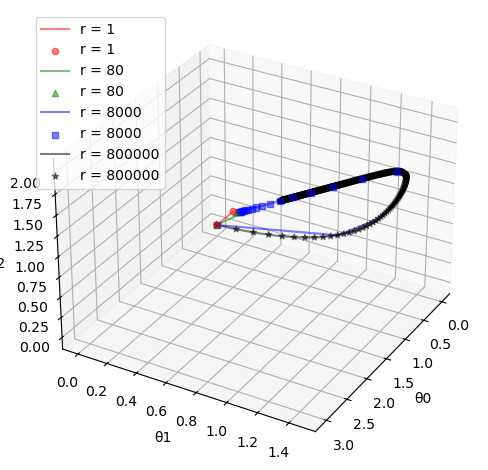

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
colors = ['r', 'g','b','k']
markers = ['o', '^','s','*']
for i in range(4):
    n = len(histories[i])
    ax.plot(histories[i][:,0],histories[i][:,1],histories[i][:,2], c = colors[i], alpha = 0.5, label = 'r = '+str(r_values[i]))
    ax.scatter(histories[i][::n-1,0],histories[i][::n-1,1],histories[i][::n-1,2], c = colors[i], marker =markers[i], alpha = 0.5, label = 'r = '+str(r_values[i]))
ax.set_xlabel("θ0")
ax.set_ylabel("θ1")
ax.set_zlabel("θ2")
ax.legend()
ax.grid(True)
ax.view_init(elev=30, azim=30)
plt.tight_layout()
plt.show()